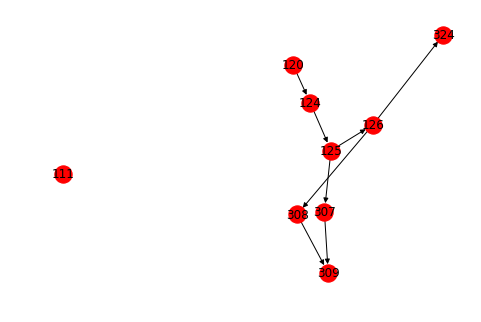

In [17]:

import networkx as nx
import matplotlib.pyplot as plt

courses = ['111','120','124','125','126','307','308','309','324']
g = nx.DiGraph()
g.add_nodes_from(courses)

# 0 1 2 3 4 5 6 7 8
g.add_edge(courses[1],courses[2])
g.add_edge(courses[2],courses[3])
g.add_edge(courses[3],courses[4])
g.add_edge(courses[3],courses[5])
g.add_edge(courses[4],courses[6])
g.add_edge(courses[5],courses[7])
g.add_edge(courses[6],courses[7])
g.add_edge(courses[4],courses[8])

nx.draw(g,with_labels=True)
plt.draw()
plt.show()


In [73]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import csv
 
# df = pd.read_excel('File.xlsx', sheetname='Sheet1')
 
# print("Column headings:")
# print(df.columns)

mydict = {} 
# num -> year -> percentage of enrollment

mydict2 = {}
# num -> year -> time -> percentage of enrollment

# ['Yr,Crs No,Section,Current Enrlmnt,Percentageof Enrollment,Limit/Est Enrlmnt,Start Time,End Time']
with open('project/su-1.csv', mode='r') as infile:
    reader = csv.reader(infile, delimiter='\t')
#     with open('coors_new.csv', mode='w') as outfile:
#         writer = csv.writer(outfile)
    i = 0
    for row in reader:
        if i == 0:
            i += 1
            continue
        
        tokens = row[0].split(",")
#         print(tokens)
        
        courseNo = tokens[1]
#         print(courseNo)
        year = tokens[0]
        perEnroll = tokens[4]
        
        secDict = {}
        if courseNo not in mydict.keys():
            allEnrolls = []
            allEnrolls.append(perEnroll)
            secDict[year] = allEnrolls
            mydict[courseNo] = secDict
#             print(mydict)
        else:
            secDict = mydict[courseNo]
#             print(secDict)
            allEnrolls = []
            if year in secDict.keys():
                allEnrolls = secDict[year]
            allEnrolls.append(perEnroll)
            
            secDict[year] = allEnrolls
#             print(secDict)
            mydict[courseNo] = secDict
#             print(mydict)
    
# print(mydict)
del mydict[""]
import json
with open('data.json', 'w') as outfile:
    json.dump(mydict, outfile)



In [86]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import csv
 
# df = pd.read_excel('File.xlsx', sheetname='Sheet1')
 
# print("Column headings:")
# print(df.columns)

mydict2 = {}
# num -> year -> time -> percentage of enrollment

# ['Yr,Crs No,Section,Current Enrlmnt,Percentageof Enrollment,Limit/Est Enrlmnt,Start Time,End Time']
with open('project/su-1.csv', mode='r') as infile:
    reader = csv.reader(infile, delimiter='\t')
#     with open('coors_new.csv', mode='w') as outfile:
#         writer = csv.writer(outfile)
    i = 0
    for row in reader:
        if i == 0:
            i += 1
            continue
        
        tokens = row[0].split(",")
#         print(tokens)
        
        courseNo = tokens[1]
#         print(courseNo)
        year = tokens[0]
        perEnroll = tokens[4]
        time = tokens[6]
        
        secDict = {} # year-> time -> percent. enrollment
        thirdDict = {} # time -> percent. enrollment
        if courseNo not in mydict2.keys():
            
            allEnrolls = []
            allEnrolls.append(perEnroll)
            thirdDict[time] = allEnrolls
            secDict[year] = thirdDict
            mydict2[courseNo] = secDict
            print(mydict2)
        else:
            secDict = mydict2[courseNo]
#             print(secDict)
            allEnrolls = []
            thirdDict = {}
            if year in secDict.keys():
                thirdDict = secDict[year]
                
            if time in thirdDict:
                allEnrolls = thirdDict[time]
                
            allEnrolls.append(perEnroll)
            thirdDict[time] = allEnrolls
            secDict[year] = thirdDict
#             print(secDict)
            mydict2[courseNo] = secDict
#             print(mydict)
    
# print(mydict)
del mydict2[""]
import json
with open('data2.json', 'w') as outfile:
    json.dump(mydict2, outfile)

{'111': {'2018': {'1050': ['32.5']}}}
{'111': {'2018': {'1050': ['32.5']}, '2017': {'1050': ['40']}, '2008': {'940': ['45.71428571'], '1050': ['60']}, '2009': {'1050': ['65.71428571']}, '2013': {'1050': ['67.5']}, '2016': {'1050': ['67.5']}, '2015': {'1050': ['70']}, '2011': {'1050': ['77.14285714']}, '2014': {'1050': ['77.5']}, '2010': {'1050': ['82.5']}, '2012': {'1050': ['95']}}, '120': {'2014': {'1050': ['28.57142857']}}}
{'111': {'2018': {'1050': ['32.5']}, '2017': {'1050': ['40']}, '2008': {'940': ['45.71428571'], '1050': ['60']}, '2009': {'1050': ['65.71428571']}, '2013': {'1050': ['67.5']}, '2016': {'1050': ['67.5']}, '2015': {'1050': ['70']}, '2011': {'1050': ['77.14285714']}, '2014': {'1050': ['77.5']}, '2010': {'1050': ['82.5']}, '2012': {'1050': ['95']}}, '120': {'2014': {'1050': ['28.57142857'], '1200': ['74.28571429']}, '2012': {'1050': ['42.85714286'], '1200': ['74.28571429'], '940': ['80']}, '2008': {'1050': ['57.14285714'], '940': ['71.42857143'], '1200': ['77.14285714

In [98]:
from tabulate import tabulate

for num in mydict.keys():
    secDictionary = mydict[num]
    line = []
    maxHeader = 1
    for year in sorted(secDictionary.keys()):
        row = []
        row.append(year)
        for enroll in secDictionary[year]:
            newEnroll = "%.2f" % float(enroll)
            if float(enroll) >= 57 and float(enroll) <= 80:
                newEnroll += "(\u2713)"
            else:
                newEnroll += "(\u2717)"
            row.append(newEnroll)
        line.append(row)
        if len(secDictionary[year]) > maxHeader:
            maxHeader = len(secDictionary[year])
        
    headers = []
    headers.append("year")
    for i in range(maxHeader):
        headers.append("Percent. Enrollment sec %d" % (i+1))
    
    print("Math " + num)
    print (tabulate(line, headers=headers))
    print()
    

Math 111
  year  Percent. Enrollment sec 1    Percent. Enrollment sec 2
------  ---------------------------  ---------------------------
  2008  45.71(✗)                     60.00(✓)
  2009  65.71(✓)
  2010  82.50(✗)
  2011  77.14(✓)
  2012  95.00(✗)
  2013  67.50(✓)
  2014  77.50(✓)
  2015  70.00(✓)
  2016  67.50(✓)
  2017  40.00(✗)
  2018  32.50(✗)

Math 120
  year  Percent. Enrollment sec 1    Percent. Enrollment sec 2    Percent. Enrollment sec 3
------  ---------------------------  ---------------------------  ---------------------------
  2008  57.14(✓)                     71.43(✓)                     77.14(✓)
  2009  72.00(✓)                     88.00(✗)                     104.00(✗)
  2010  60.00(✓)                     74.29(✓)
  2011  85.71(✗)                     97.14(✗)
  2012  42.86(✗)                     74.29(✓)                     80.00(✓)
  2013  62.86(✓)                     63.33(✓)
  2014  28.57(✗)                     74.29(✓)
  2015  91.43(✗)
  2016  85.71(✗)
  2017 

In [107]:
from tabulate import tabulate

for num in mydict2.keys():
    secDictionary = mydict2[num]
    line = []
    maxHeader = 1
    # year -> time -> percent. enrollment
    for year in sorted(secDictionary.keys()):
        thirdDict = secDictionary[year]
        row = []
        row.append(year)
        # time -> percent. enrollment
        for time in thirdDict.keys():
            enrolls = thirdDict[time]
            newEnrolls = ""
            for enroll in enrolls:
                newEnroll = "%.2f" % float(enroll)
                if float(enroll) >= 57 and float(enroll) <= 80:
                    newEnroll += "(" + time + "\u2713)"
                else:
                    newEnroll += "(" + time + "\u2717)"
                newEnrolls += " " + newEnroll
            row.append(newEnrolls.strip())


#         print(thirdDict)
        if len(secDictionary[year]) > maxHeader:
            maxHeader = len(secDictionary[year])
        line.append(row)
        
    headers = []
    headers.append("year")
    for i in range(maxHeader):
        headers.append("Percent. Enrollment sec %d" % (i+1))
    
    print("Math " + num)
    print (tabulate(line, headers=headers))
    print()
    

Math 111
  year  Percent. Enrollment sec 1    Percent. Enrollment sec 2
------  ---------------------------  ---------------------------
  2008  45.71(940✗)                  60.00(1050✓)
  2009  65.71(1050✓)
  2010  82.50(1050✗)
  2011  77.14(1050✓)
  2012  95.00(1050✗)
  2013  67.50(1050✓)
  2014  77.50(1050✓)
  2015  70.00(1050✓)
  2016  67.50(1050✓)
  2017  40.00(1050✗)
  2018  32.50(1050✗)

Math 120
  year  Percent. Enrollment sec 1    Percent. Enrollment sec 2    Percent. Enrollment sec 3
------  ---------------------------  ---------------------------  ---------------------------
  2008  57.14(1050✓)                 71.43(940✓)                  77.14(1200✓)
  2009  72.00(1050✓)                 88.00(940✗)                  104.00(1200✗)
  2010  60.00(1200✓)                 74.29(1050✓)
  2011  85.71(1050✗)                 97.14(1200✗)
  2012  42.86(1050✗)                 74.29(1200✓)                 80.00(940✓)
  2013  62.86(1050✓)                 63.33(1200✓)
  2014  28.57(1050✗)